In [27]:
import cv2
import numpy as np
from utils import plot_images

In [28]:
path = "data/oppenheimer.jpg"
img = cv2.imread(path, 0)

### Image Negative

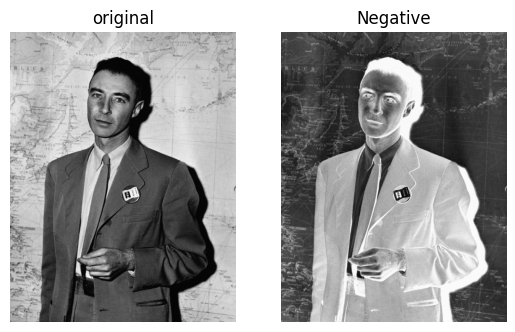

In [29]:
negative = 255 - img
plot_images(img, "original", negative, "Negative")

### Log transform
Essentially brightens a dark image.

$s = c \log(1 + r)$

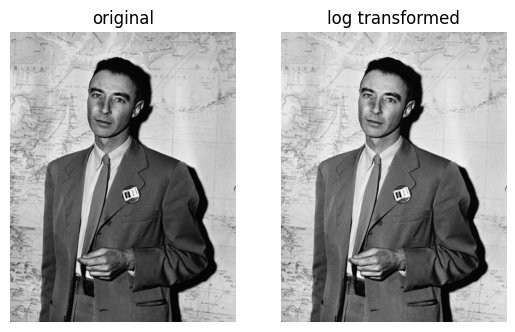

In [30]:
c = 1.0
log_transformed = c * np.log(1 + img / 255)
log_transformed = (255 * log_transformed).astype(np.uint8) # convert to integer representation
plot_images(img, "original", log_transformed, "log transformed")

### Power law (gamma) transform

$ s = c r ^ \gamma $, where $c$ and $\gamma$ are positive constants. 

A variety of transformations can be obtained by simply varying $\gamma$. Curves generated with $\gamma < 1$ have the opposite effect to those generated with $\gamma > 1$.

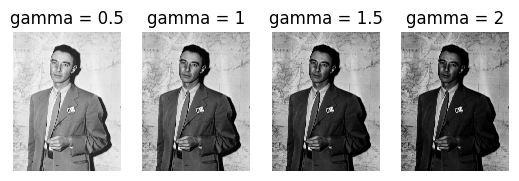

In [31]:
image_list = []

gs = [0.5, 1, 1.5, 2]
for gamma in gs:
    gamma_corrected = (img / 255) ** gamma
    gamma_corrected = (255 * gamma_corrected).astype(np.uint8)
    image_list.extend((gamma_corrected, f"gamma = {gamma}"))

plot_images(*image_list, ncols=3)

## Piecewise-linear functions

### Contrast stretching

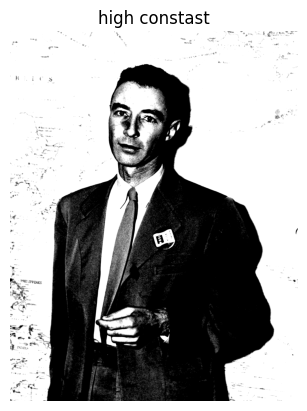

In [32]:
def F(pixel, r1, s1, r2, s2):
    if 0 <= pixel < r1:
        return (s1 / r1) * pixel
    elif r1 <= pixel < r2:
        return ((s2 - s1) / (r2 - r1)) * (pixel - r1) + s1
    else:
        return ((255 - s2) / (255 - r2)) * (pixel - r2) + s2
    
F_vec = np.vectorize(F)
constrast_stretched = F_vec(img, 70, 0, 140, 255)
plot_images(constrast_stretched, "high constast")

### Intensity-level slicing
Also known as gray-level slicing

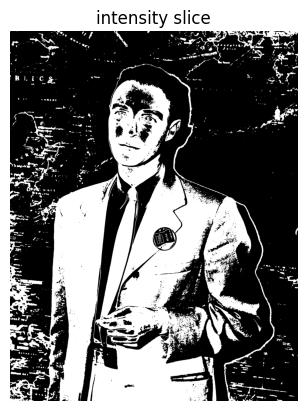

In [33]:
def F(pixel, a, b):
    if a <= pixel <= b:
        return 255
    return 0

F_vec = np.vectorize(F)
intensity_slice = F_vec(img, 50, 150)
plot_images(intensity_slice, "intensity slice")